# Unit 03

`````{tab-set}
````{tab-item} Objective

::::{important} Objective

In this practical session, you’ll get hands-on experience with the Digital Chemistry Python package, [RDKit](https://www.rdkit.org/docs/source/rdkit.html). 
You will use RDKit to calculate molecular descriptors and generate different structural representations for aspirin (details provided in the next tab).

::::

````

````{tab-item} Exercises

:::{tip} Exercises

Create a dictionary with the molecular IDs as **keys** and a dictionary with the following features as **values**.

MOL ('mol')
: RDkit Mol Object (Graph representation of molecular structure)

NUMBER OF ATOMS ('atNum')
:  total number of atoms (including H-atoms)

NUMBER OF BONDS ('bondNum')
:  total number of bonds (including single, double and triple bonds)

SMILES ('smiles')
:  SMILES string

InChI ('inchi')
:  InChI name

ADJACENCY MATRIX ('adj_mat')
:  adjacency matrix 

TOPOLOGICAL DISTANCE MATRIX ('dist_mat_top')
:  matrix of topological pairwise distances between atoms

GEOMETRIC DISTANCE MATRIX ('dist_mat_geo')
:  matrix of geometric pairwise distances between atoms 

:::

````

````{tab-item} Further Information

:::{admonition}Further Information
- [`rdkit` package](https://www.rdkit.org/docs/source/rdkit.html)
- [`rdkit.Chem` package](https://www.rdkit.org/docs/source/rdkit.Chem.html)
- [`networkx` tutorial](https://networkx.org/documentation/stable/tutorial.html)
:::

````
`````

## Import all needed packages

In [1]:
import os, sys
import pandas as pd
import py3Dmol ## for 3d visualizations
import rdkit
from rdkit.Chem import AllChem
from rdkit import Chem 
import numpy as np   


# A) Structural representations and descriptors of K01

::::{tip} Task A1

Given the Lewis Structure of Aspirin (see below), derive its SMILES notation with the information provided in the lecture.
You can use for example [this tool](https://app.naturalproducts.net/chem) for sanity check your derived SMILES.

![aspirin](aspirin.png)

:::{admonition} Create RDKit Molecule object from SMILES
:class: dropdown
You can create an RDKit Molecule object from a smiles, using the following code:

```{code-block} python
:lineno-start: 1
:emphasize-lines: 1

mol = rdkit.Chem.MolFromSmiles('CC(=O)C')
```

You can easily visualize the RDKit mol graph by just entering the name of your mol-object at the end of a jupyter notebook cell and evaluating it. It will output a 2D-graph of the molecular structure.

:::
::::

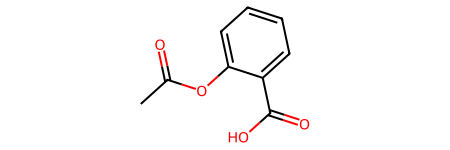

In [2]:
# mol object

# Create molecule from SMILES
mol = Chem.MolFromSmiles('CC(=O)OC1=CC=CC=C1C(=O)O')


mol


::::{tip} Task A2

Explore the structural features, you can access from your mol object. 
Access the following structural descriptors and representations from your mol object (SMILES) and store them a Pandas dataframe using the indicated column names.

MOL ('mol')
: RDkit Mol Object (Graph representation of molecular structure)

NUMBER OF ATOMS ('atNum')
:  total number of atoms (including H-atoms)

NUMBER OF BONDS ('bondNum')
:  total number of bonds (including single, double and triple bonds)

SMILES ('smiles')
:  SMILES string

InChI ('inchi')
:  InChI name

ADJACENCY MATRIX ('adj_mat')
:  adjacency matrix 

TOPOLOGICAL DISTANCE MATRIX ('dist_mat_top')
:  matrix of topological pairwise distances between atoms

:::{note}
To test if the conversion to InChI and SMILES went correct. Try to generate a graph from the SMILES and InChI. 
:::
::::


In [3]:

# Make sure mol has H atoms for accurate counts
mol_with_h = Chem.AddHs(mol)

# Extract all reqquired features
data = {
    'mol': [mol],
    'atNum': [mol_with_h.GetNumAtoms()],
    'bondNum': [mol_with_h.GetNumBonds()],
    'smiles': [Chem.MolToSmiles(mol)],
    'inchi': [Chem.MolToInchi(mol)],
    'adj_mat': [Chem.GetAdjacencyMatrix(mol)],
    'dist_mat_top': [Chem.GetDistanceMatrix(mol)]
}

# Create DataFrame
df = pd.DataFrame(data)
df

,mol,atNum,bondNum,smiles,inchi,adj_mat,dist_mat_top
0,<rdkit.Chem.rdchem.Mol object at 0x79e23b2ec190>,21,21,CC(=O)Oc1ccccc1C(=O)O,InChI=1S/C9H8O4/c1-6(10)13-8-5-3-2-4-7(8)9(11)...,"[[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [1, ...","[[0.0, 1.0, 2.0, 2.0, 3.0, 4.0, 5.0, 6.0, 5.0,..."


::::{tip} Task A3

Write a function that takes an RDKit Mol object (graph) and returns a **Distance Matrix** of geometric distances as structural representation.
Employ the argument `redundant` (type: boolean) to toggle use of only heavy atoms ($Z>1$) or all atoms (if `redundant` is False).

The Distance matrix $D_{ij}$ is defined as 

:::math
D_{ij} = 
\begin{cases}
    0, & \text{for } j=j \\
     & \\
    |R_i-R_j|, & \text{for } i \leq j \\
\end{cases}
:::

Store the respective matrix in your dataframe:

GEOMETRIC DISTANCE MATRIX ('dist_mat_geo')
:  matrix of geometric pairwise distances between atoms 

:::{admonition} Calculating the distance between two atoms
:class: dropdown
You can calculate the distance between two points in 3D space using the Euclidean distance formula. 
Here's how you can do it in Python with numpy

```{code-block} python
:lineno-start: 1
:emphasize-lines: 1, 7
import numpy as np

# Example lists of Cartesian coordinates
point1 = [1, 2, 3]
point2 = [4, 5, 6]

distance = np.linalg.norm(np.array(point1) - np.array(point2))
```
:::

:::{admonition} Graphs without H-atoms
:class: dropdown

When redundant is True, the hydrogen atoms should be removed in the distance matrix. To do so, one can for example, remove H-atoms from the input graph (mol).
This can be done by using the following python code:

```{code-block} python
:lineno-start: 8
:emphasize-lines: 8

mol = rdkit.Chem.RemoveHs(mol)
```
:::

:::{admonition} Computing 3D structures for graphs without 3D structural information
:class: dropdown

If the molecule does not have any conformers, one first has to add hydrogen atoms and subsequently embed the molecule
using a force field (ETKDG) to generate 3D structural information.
This can be realized by using the followign python code:

```{code-block} python
:lineno-start: 9
:emphasize-lines: 12

mol = rdkit.Chem.MolFromSmiles("CCO") # ethanol without 3D info
if not mol.GetNumConformers():
    mol = rdkit.Chem.AddHs(mol) # generate graph for C2H5OH
    AllChem.EmbedMolecule(mol, AllChem.ETKDG()) # 3D info from FF
```
:::

Add the geometric distance matrices as an additional column in the dataset.

::::

In [4]:
# Get distance matrix


def get_geometric_distance_matrix(mol, redundant=False):

    """
    Calculates distances between all pairs of atoms in a molecule.
    
    mol: molecule object
    redundant: False = heavy atoms only, True = all atoms
    
    Returns: distance matrix
    """
    
    mol_copy = Chem.Mol(mol)
    
    # Remove H atoms if redundant is False
    if not redundant:
        mol_copy = Chem.RemoveHs(mol_copy)
    
    # Ensure molecule has 3D coordinates
    if not mol_copy.GetNumConformers():
        mol_copy = Chem.AddHs(mol_copy)
        AllChem.EmbedMolecule(mol_copy, AllChem.ETKDG())
        if not redundant:
            mol_copy = Chem.RemoveHs(mol_copy)
    
    # Get the conformer (3D structure)
    conf = mol_copy.GetConformer()
    num_atoms = mol_copy.GetNumAtoms()
    
    # Initialize distance matrix
    dist_matrix = np.zeros((num_atoms, num_atoms))
    
    # Calculate pairwise distances
    for i in range(num_atoms):
        for j in range(i, num_atoms):
            if i == j:
                dist_matrix[i][j] = 0
            else:
                # Get atomic positions
                pos_i = conf.GetAtomPosition(i)
                pos_j = conf.GetAtomPosition(j)
                
                # Calculate Euclidean distance
                distance = np.linalg.norm(
                    np.array([pos_i.x, pos_i.y, pos_i.z]) - 
                    np.array([pos_j.x, pos_j.y, pos_j.z])
                )
                
                # Matrix is symmetric
                dist_matrix[i][j] = distance
                dist_matrix[j][i] = distance
    
    return dist_matrix

# Test the function
dist_mat_geo = get_geometric_distance_matrix(mol, redundant=False)
print("Geometric distance matrix shape:", dist_mat_geo.shape)
print("\nFirst few rows:\n", dist_mat_geo[:3, :3])


Geometric distance matrix shape: (13, 13)

First few rows:
 [[0.         1.47131245 2.3991584 ]
 [1.47131245 0.         1.2760297 ]
 [2.3991584  1.2760297  0.        ]]


In [5]:
# add it to dataframe
df['dist_mat_geo'] = [get_geometric_distance_matrix(mol, redundant=False)]
df

,mol,atNum,bondNum,smiles,inchi,adj_mat,dist_mat_top,dist_mat_geo
0,<rdkit.Chem.rdchem.Mol object at 0x79e23b2ec190>,21,21,CC(=O)Oc1ccccc1C(=O)O,InChI=1S/C9H8O4/c1-6(10)13-8-5-3-2-4-7(8)9(11)...,"[[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [1, ...","[[0.0, 1.0, 2.0, 2.0, 3.0, 4.0, 5.0, 6.0, 5.0,...","[[0.0, 1.4957258932153688, 2.417464932812527, ..."


::::{tip} Task A4

Write a function that takes an RDKit Mol object (graph) and returns a **Coulomb Matrix** with the respective list of atomic numbers for the atoms in the molecule.

Employ the argument `redundant` (type: boolean) to toggle use of only heavy atoms ($Z>1$) or all atoms (if `redundant` is False).
Additionaly, use the argument `sortedCM` (type:boolean) to return the original unsorted Coulomb Matrix if `sortedCM` is False and the sorted Coulomb matrix (sorted by atomic numbers, $Z$) otherwise.

The Coulomb matrix $M_{ij}$ is defined as 

:::math
M_{ij} = 
\begin{cases}
    0.5 Z_i^{2.4}, & \text{for } j=j \\
     & \\
    \displaystyle\frac{Z_iZ_j}{|R_i-R_j|}, & \text{for } i \leq j \\
\end{cases}
:::

:::{note}
:class: dropdwon
Make sure to check that the input graph has all bonding information and atoms that are needed. E.g., raise an error, when the graph only contains heavy atoms, or does not contain any 3D structural information.
:::

Add the Coulomb Matrices as an additional column to your dataset.
::::

In [6]:
# get Coulomb Matrix

def get_coulomb_matrix(mol, redundant=False, sortedCM=False):

    """
    Calculates the Coulomb Matrix for a molecule.
    
    mol: molecule object
    redundant: False = heavy atoms only, True = all atoms
    sortedCM: True = sort by atomic number, False = unsorted
    
    Returns: (coulomb_matrix, atomic_numbers)
    """

    mol_copy = Chem.Mol(mol)
    
    # Add hydrogens firsts
    mol_copy = Chem.AddHs(mol_copy)
    
    if not mol_copy.GetNumConformers():
        AllChem.EmbedMolecule(mol_copy, AllChem.ETKDG())
    
    if not redundant:
        mol_copy = Chem.RemoveHs(mol_copy)
    
    if not mol_copy.GetNumConformers():
        raise ValueError("Molecule does not contain 3D structural information")
    
    conf = mol_copy.GetConformer()
    num_atoms = mol_copy.GetNumAtoms()
    
    # Get atomic numbers
    atomic_numbers = np.array([atom.GetAtomicNum() for atom in mol_copy.GetAtoms()])
    
    if not redundant and np.any(atomic_numbers == 1):
        raise ValueError("Graph contains hydrogen atoms. Set redundant=True or remove H atoms.")
    
    # Initialize Coulomb matrix
    coulomb_matrix = np.zeros((num_atoms, num_atoms))
    
    # Calculate Coulomb matrix elements
    for i in range(num_atoms):
        for j in range(num_atoms):
            if i == j:
                # Diagonal elements:
                coulomb_matrix[i][j] = 0.5 * (atomic_numbers[i] ** 2.4)
            else:
                # Off-diagonal elements:
                pos_i = conf.GetAtomPosition(i)
                pos_j = conf.GetAtomPosition(j)
                
                distance = np.linalg.norm(
                    np.array([pos_i.x, pos_i.y, pos_i.z]) - 
                    np.array([pos_j.x, pos_j.y, pos_j.z])
                )
                
                coulomb_matrix[i][j] = (atomic_numbers[i] * atomic_numbers[j]) / distance
    
    # Sort by atomic numbers if requested
    if sortedCM:
        sort_indices = np.argsort(atomic_numbers)[::-1]
        coulomb_matrix = coulomb_matrix[sort_indices, :][:, sort_indices]
        atomic_numbers = atomic_numbers[sort_indices]
    
    return coulomb_matrix, atomic_numbers

In [7]:
# add Coulomb Matrix to dataframe
cm_unsorted, z_unsorted = get_coulomb_matrix(mol, redundant=False, sortedCM=False)
cm_sorted, z_sorted = get_coulomb_matrix(mol, redundant=False, sortedCM=True)

df['coulomb_matrix_unsorted'] = [cm_unsorted]
df['coulomb_matrix_sorted'] = [cm_sorted]
df['atomic_numbers'] = [z_unsorted]

df

,mol,atNum,bondNum,smiles,inchi,adj_mat,dist_mat_top,dist_mat_geo,coulomb_matrix_unsorted,coulomb_matrix_sorted,atomic_numbers
0,<rdkit.Chem.rdchem.Mol object at 0x79e23b2ec190>,21,21,CC(=O)Oc1ccccc1C(=O)O,InChI=1S/C9H8O4/c1-6(10)13-8-5-3-2-4-7(8)9(11)...,"[[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [1, ...","[[0.0, 1.0, 2.0, 2.0, 3.0, 4.0, 5.0, 6.0, 5.0,...","[[0.0, 1.4957258932153688, 2.417464932812527, ...","[[36.85810519942594, 24.141184114907716, 20.22...","[[73.51669471981023, 28.090744478860255, 13.28...","[6, 6, 8, 8, 6, 6, 6, 6, 6, 6, 6, 8, 8]"


:::{note}
Compute the sorted and unsorted Coulomb matrix of Aspirin (`mol`). And plot the matrices using the provided matplotlib code.
:::

In [ ]:
# plot
import matplotlib.pyplot as plt

# Compute sorted and unsorted Coulomb matrices
cm_unsorted, z_unsorted = get_coulomb_matrix(mol, redundant=False, sortedCM=False)
cm_sorted, z_sorted = get_coulomb_matrix(mol, redundant=False, sortedCM=True)

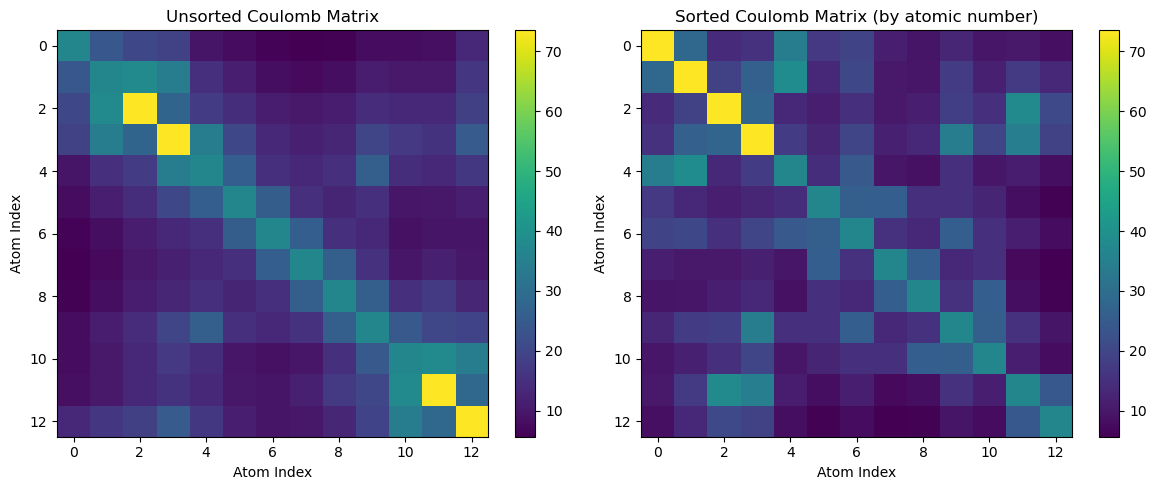

In [ ]:
# Figures with two subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Plot unsorted Coulomb matrix
im1 = axes[0].imshow(cm_unsorted, cmap='viridis', aspect='auto')
axes[0].set_title('Unsorted Coulomb Matrix')
axes[0].set_xlabel('Atom Index')
axes[0].set_ylabel('Atom Index')
plt.colorbar(im1, ax=axes[0])

# Plot sorted Coulomb matrix
im2 = axes[1].imshow(cm_sorted, cmap='viridis', aspect='auto')
axes[1].set_title('Sorted Coulomb Matrix (by atomic number)')
axes[1].set_xlabel('Atom Index')
axes[1].set_ylabel('Atom Index')
plt.colorbar(im2, ax=axes[1])

plt.tight_layout()
plt.show()

In [ ]:
print("Unsorted atomic numbers:", z_unsorted)
print("Sorted atomic numbers:", z_sorted)
print("\nMatrix shapes:")
print("Unsorted:", cm_unsorted.shape)
print("Sorted:", cm_sorted.shape)

Unsorted atomic numbers: [6 6 8 8 6 6 6 6 6 6 6 8 8]
Sorted atomic numbers: [8 8 8 8 6 6 6 6 6 6 6 6 6]

Matrix shapes:
Unsorted: (13, 13)
Sorted: (13, 13)
